## Описание датасета
#### Датасет содержит данные о машинах для прогнозируемого технического обслуживания
#### Цель - прогнозирование тенденций на рынке аренды

| Признак | Описание |
|:-------:|:--------:|
| UID | уникальный идентификатор в диапазоне от 1 до 10000 |
| productID | состоит из букв L, M или H, обозначающих качество продукции, серийного номера, соответствующего конкретному варианту | 
| air temperature [K] | температура воздуха | 
| process temperature [K] | температура процесса во время работы двигателя |
| rotational speed [rpm] | частота вращения с учетом нормально распределенного шума |
| torque [Nm] | крутящий момент | 
| tool wear [min] | износ инструмента. Варианты качества H/M/L увеличивают износ инструмента |
| Target | Провал или нет |
| Failure Type | Тип неисправности |



In [1]:
import pandas as pd
from plotnine import *

In [2]:
df = pd.read_csv("predictive_maintenance.csv")

In [3]:
df.head(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,No Failure
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,No Failure
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,No Failure
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,No Failure
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,No Failure


In [4]:
df= df.rename(columns={"Air temperature [K]": "Air Temp", "Process temperature [K]": "Process Temp", "Rotational speed [rpm]": "Rotational Speed", "Torque [Nm]":"Torque", "Tool wear [min]":"Tool wear"})
df.head(5)

,UDI,Product ID,Type,Air Temp,Process Temp,Rotational Speed,Torque,Tool wear,Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


### 1. Зависимость износа инcтрумента (tool wear) и тип неисправности (Failure Type)

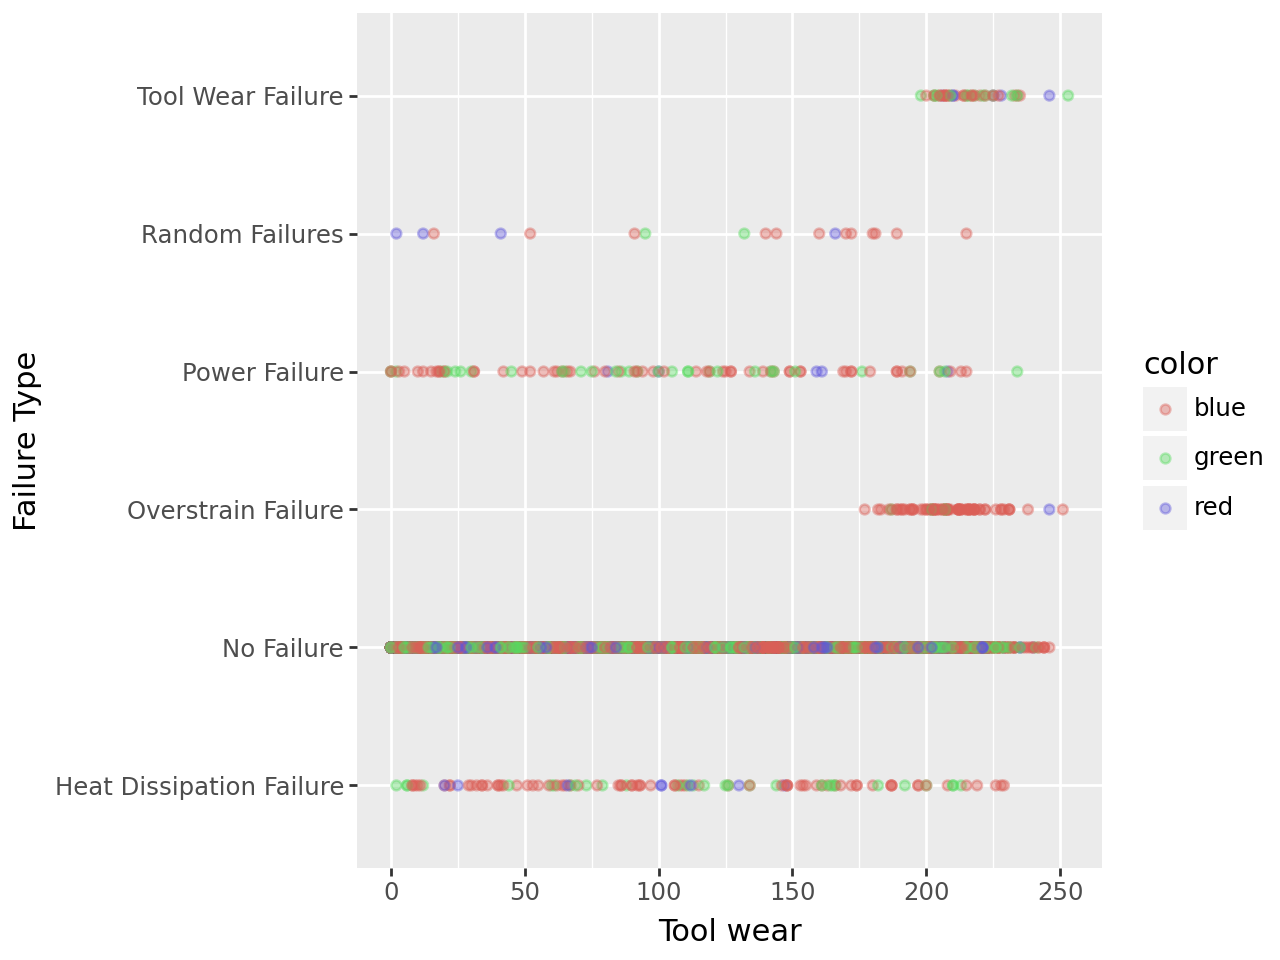

In [5]:
color_map = {'L': 'blue', 'M': 'green', 'H': 'red'}
df['color'] = df['Type'].map(color_map)

ggplot(df, aes(x='Tool wear', y='Failure Type', color='color')) +\
geom_point(alpha=0.4)

### 2. Гистограмма износа инструмента

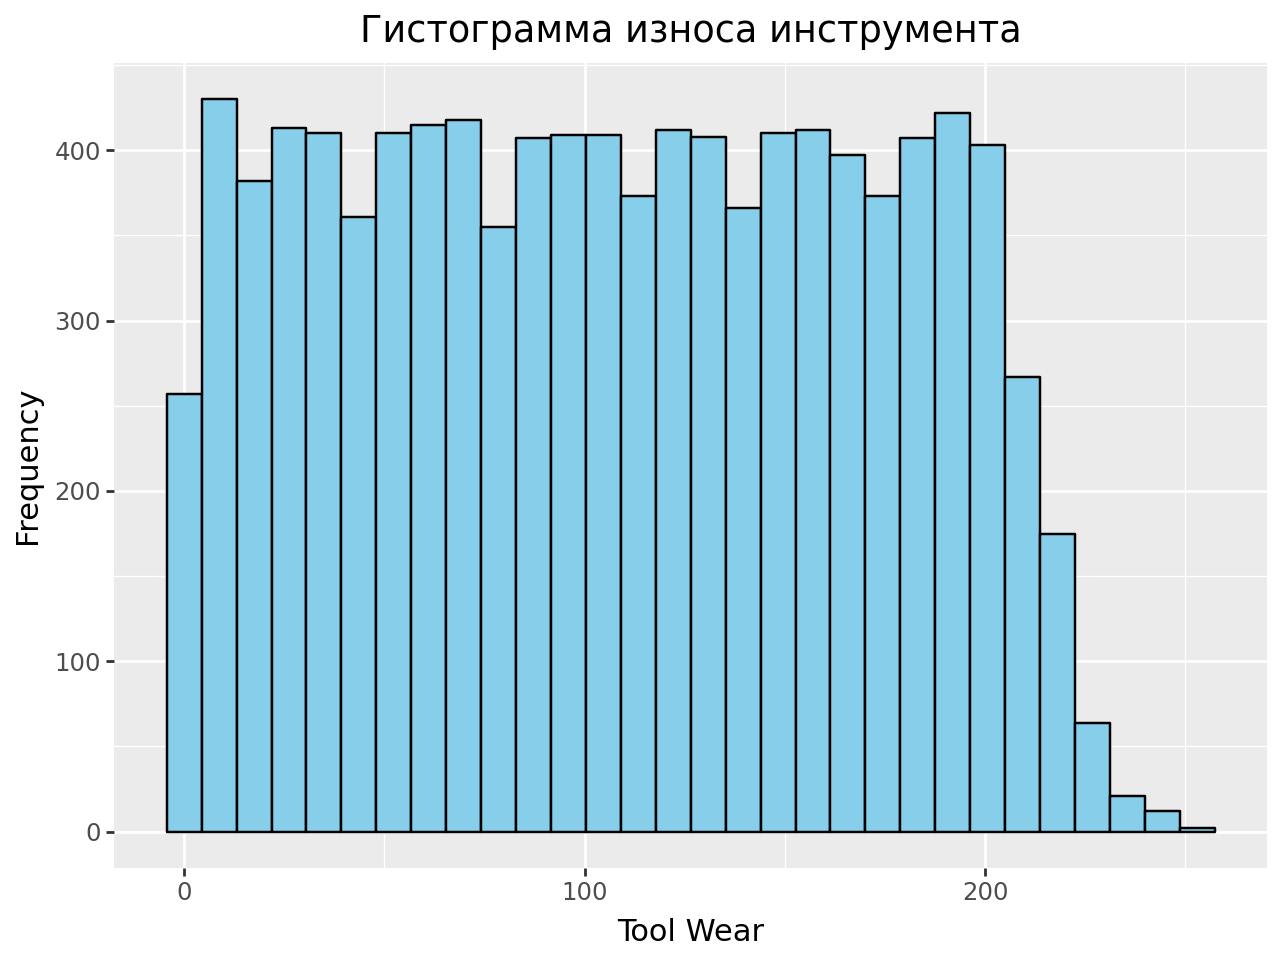

In [6]:
ggplot(df, aes(x='Tool wear')) +\
geom_histogram(bins=30, fill='skyblue', color='black') +\
labs(x='Tool Wear', y='Frequency', title='Гистограмма износа инструмента') 

### 3. График плотности для Torque

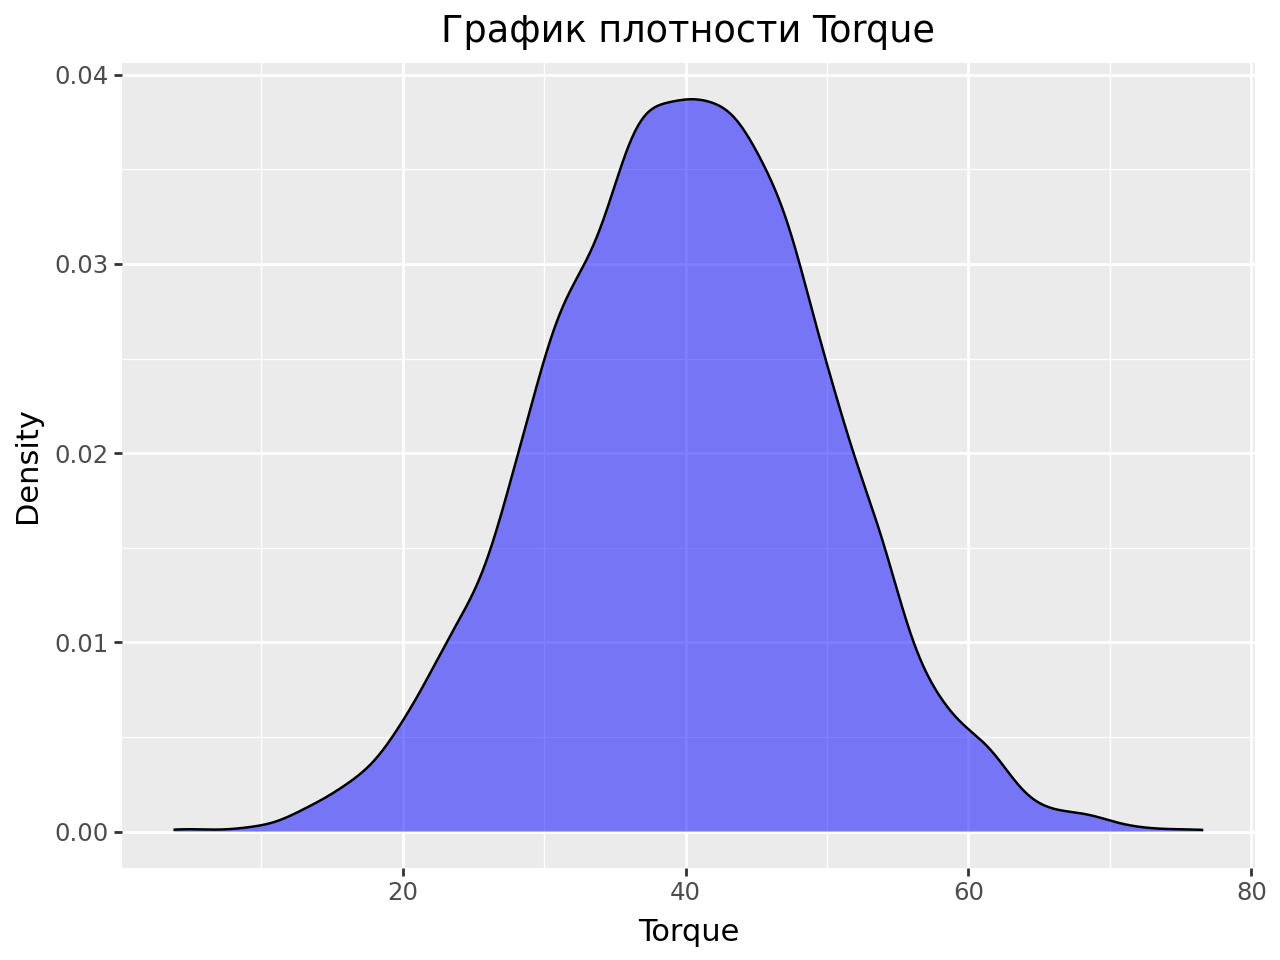

In [7]:
ggplot(df, aes(x='Torque')) +\
geom_density(fill='blue', alpha=0.5) +\
ggtitle('График плотности Torque') +\
xlab('Torque') +\
ylab('Density')

### 4. Зависимость Процессной температуры (process temperature) и частоты вращения (rotational speed):

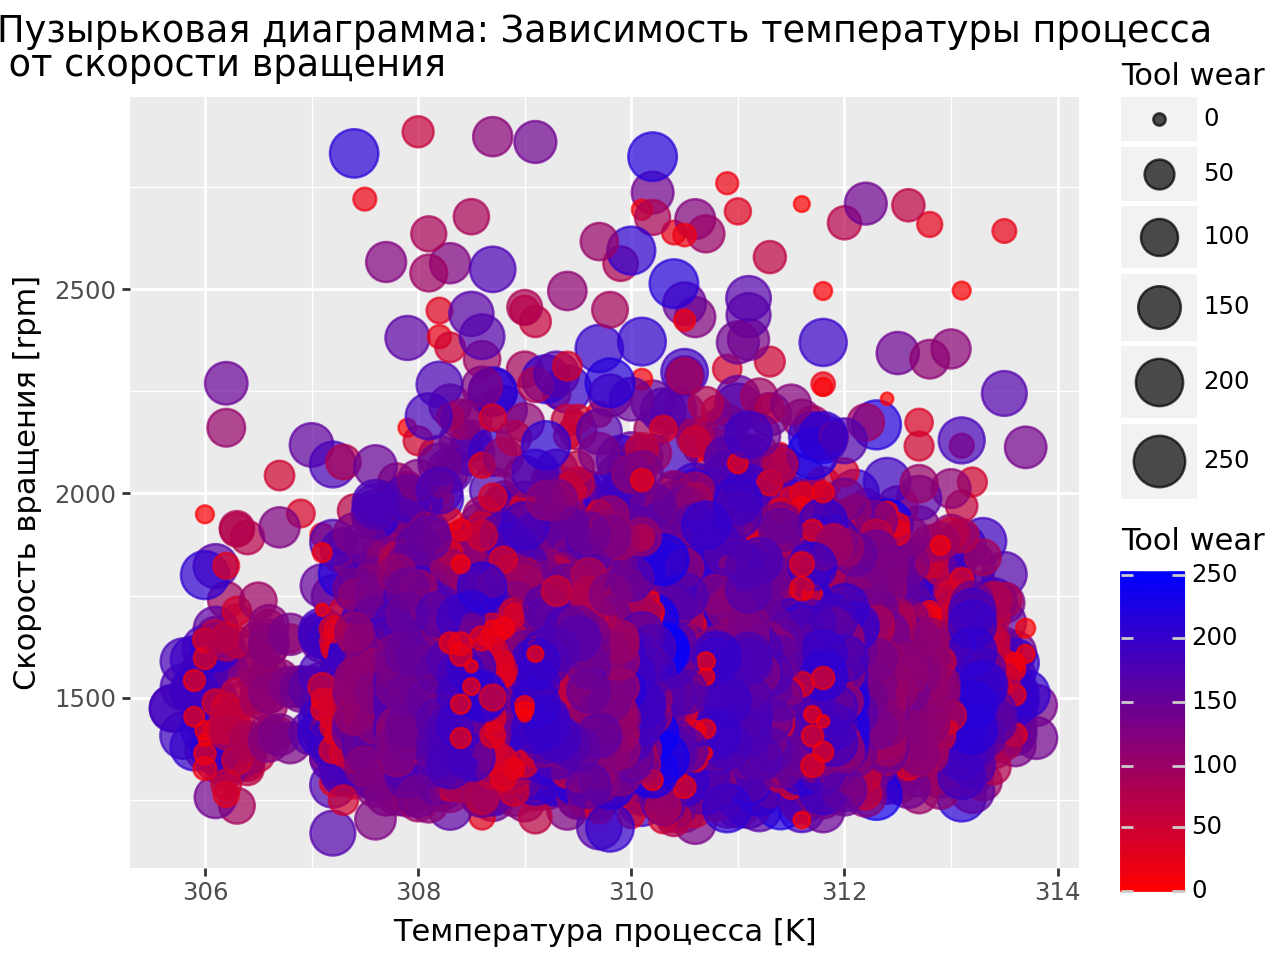

In [8]:
ggplot(df, aes(x='Process Temp', y='Rotational Speed', size='Tool wear', color='Tool wear')) +\
geom_point(alpha=0.7, stroke=0.5) +\
scale_size(range=[2, 10]) +\
scale_color_gradient(low='red', high='blue') +\
ggtitle('Пузырьковая диаграмма: Зависимость температуры процесса\n от скорости вращения') +\
xlab('Температура процесса [K]') +\
ylab('Скорость вращения [rpm]') 

### 5.Диаграмма размаха зависимости типа неисправности (Failure Type) от Крутящего моммента (Torque) 

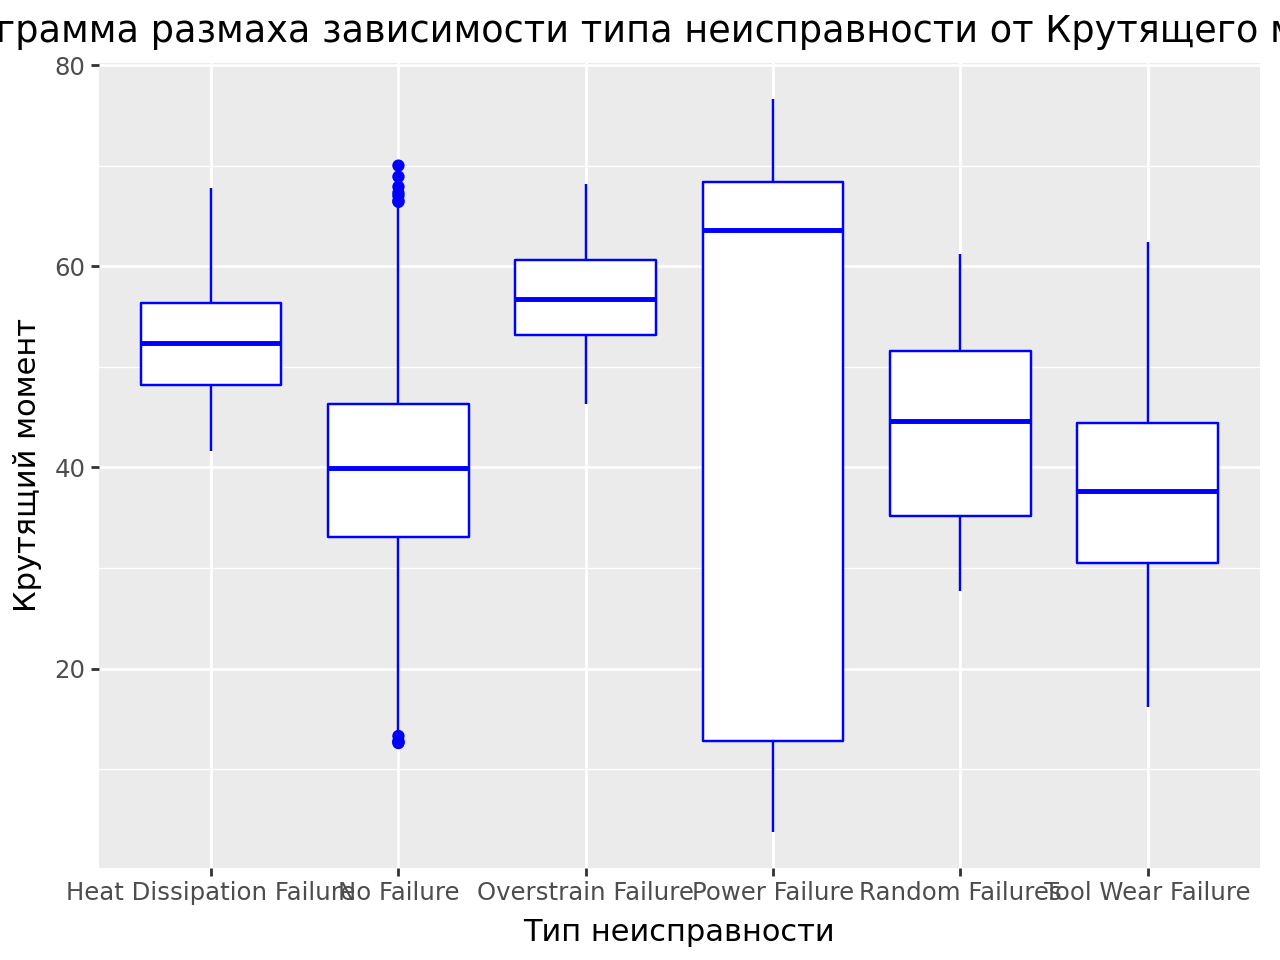

In [9]:
ggplot(df, aes(x='Failure Type', y='Torque')) +\
geom_boxplot(color='blue') +\
ggtitle("Диаграмма размаха зависимости типа неисправности от Крутящего момента") +\
xlab("Тип неисправности") +\
ylab("Крутящий момент")


### 6.Линейный график зависимости типа неисправности (Failure Type) от Крутящего моммента (Torque) 

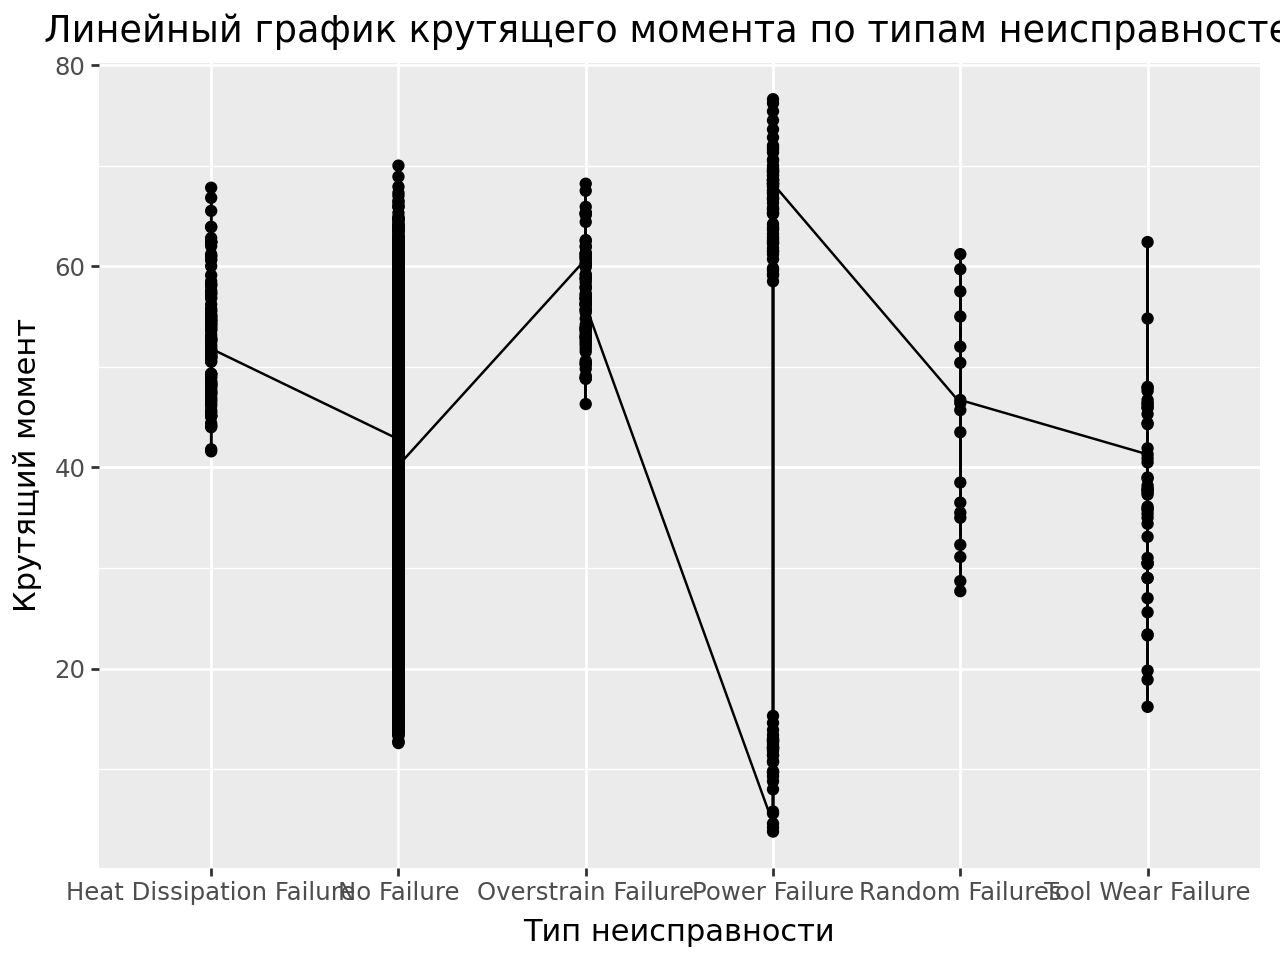

In [10]:
ggplot(df, aes(x='Failure Type', y='Torque', group=1)) +\
geom_line() +\
geom_point() +\
scale_x_discrete() +\
ggtitle('Линейный график крутящего момента по типам неисправностей') +\
xlab('Тип неисправности') +\
ylab('Крутящий момент')


### 7.Линейный график зависимости изменения температуры воздуха [K] по "UDI":

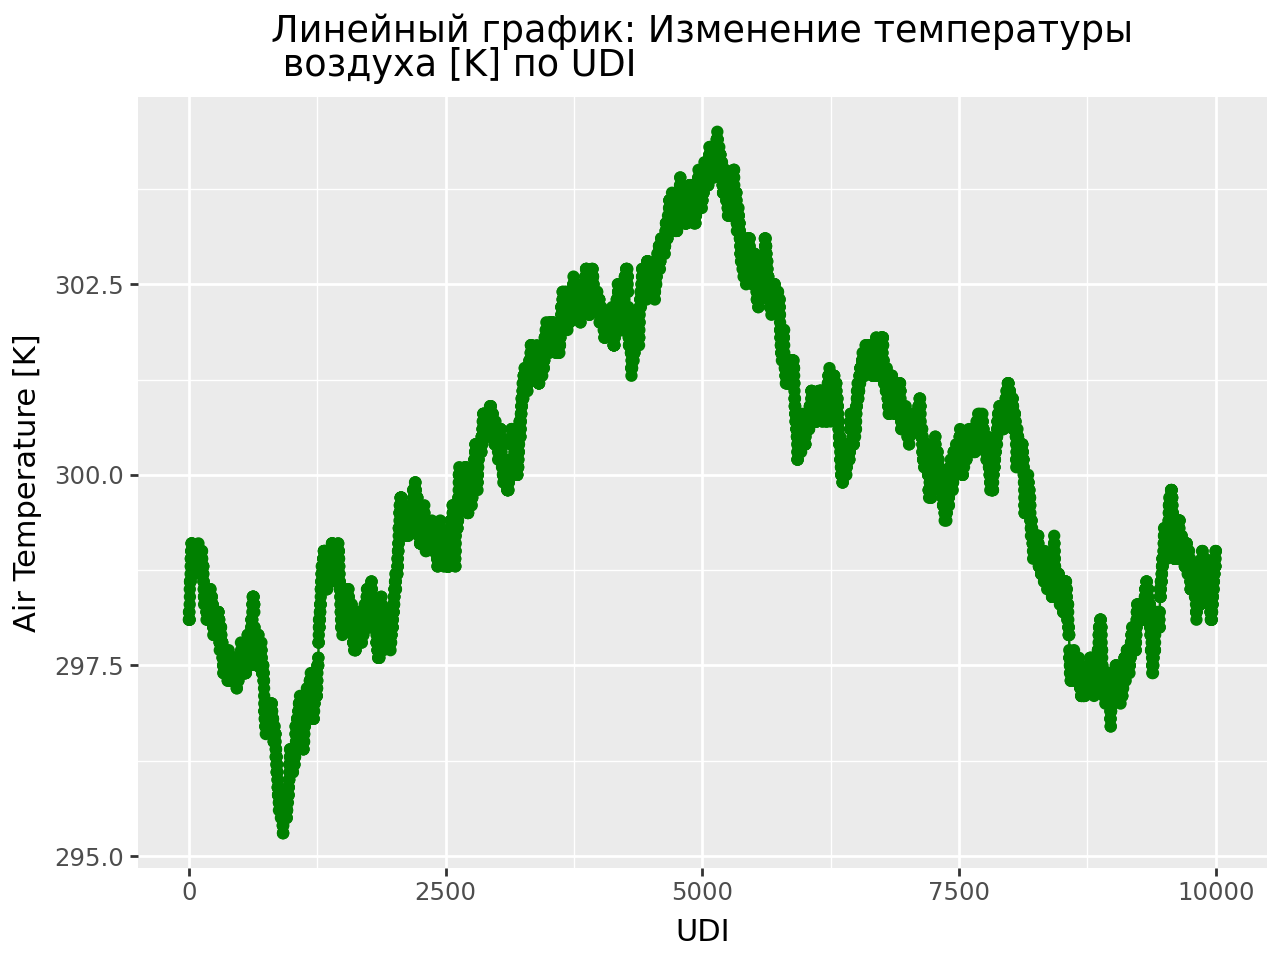

In [11]:
ggplot(df, aes(x='UDI', y='Air Temp')) +\
geom_line(color='green') +\
geom_point(color='green') +\
ggtitle('Линейный график: Изменение температуры\n воздуха [K] по UDI') +\
xlab('UDI') +\
ylab('Air Temperature [K]')

## 8.Диаграмма рассеяния с регрессионной линией

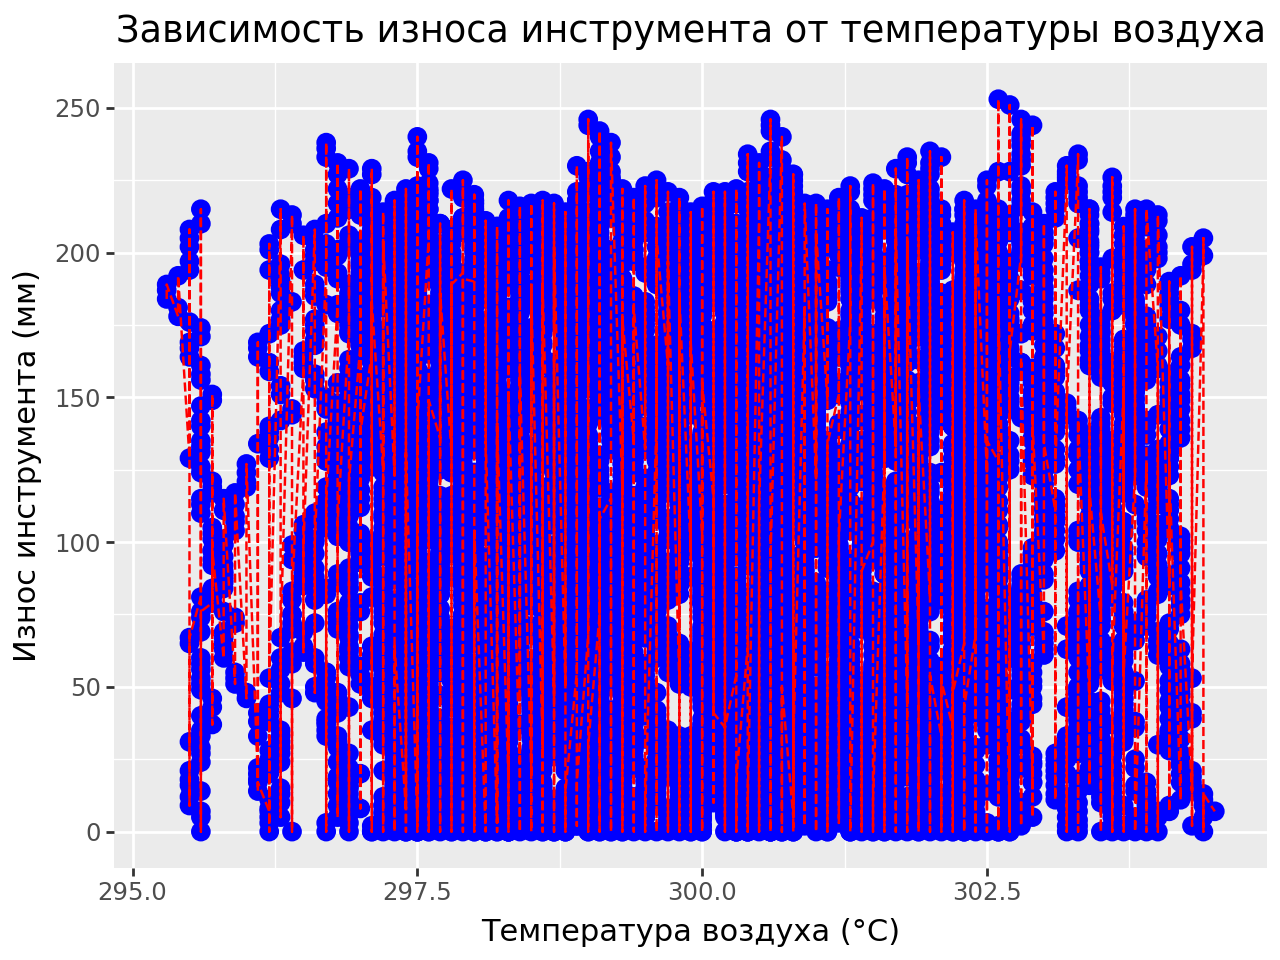

In [12]:
ggplot(df, aes(x='Air Temp', y='Tool wear')) +\
geom_point(color='blue', size=3) +\
geom_line(color='red', linetype='dashed') +\
labs(x='Температура воздуха (°C)', y='Износ инструмента (мм)', title='Зависимость износа инструмента от температуры воздуха')

### 9.Диаграмма рассеивания: крутящий момент от скорости Вращения

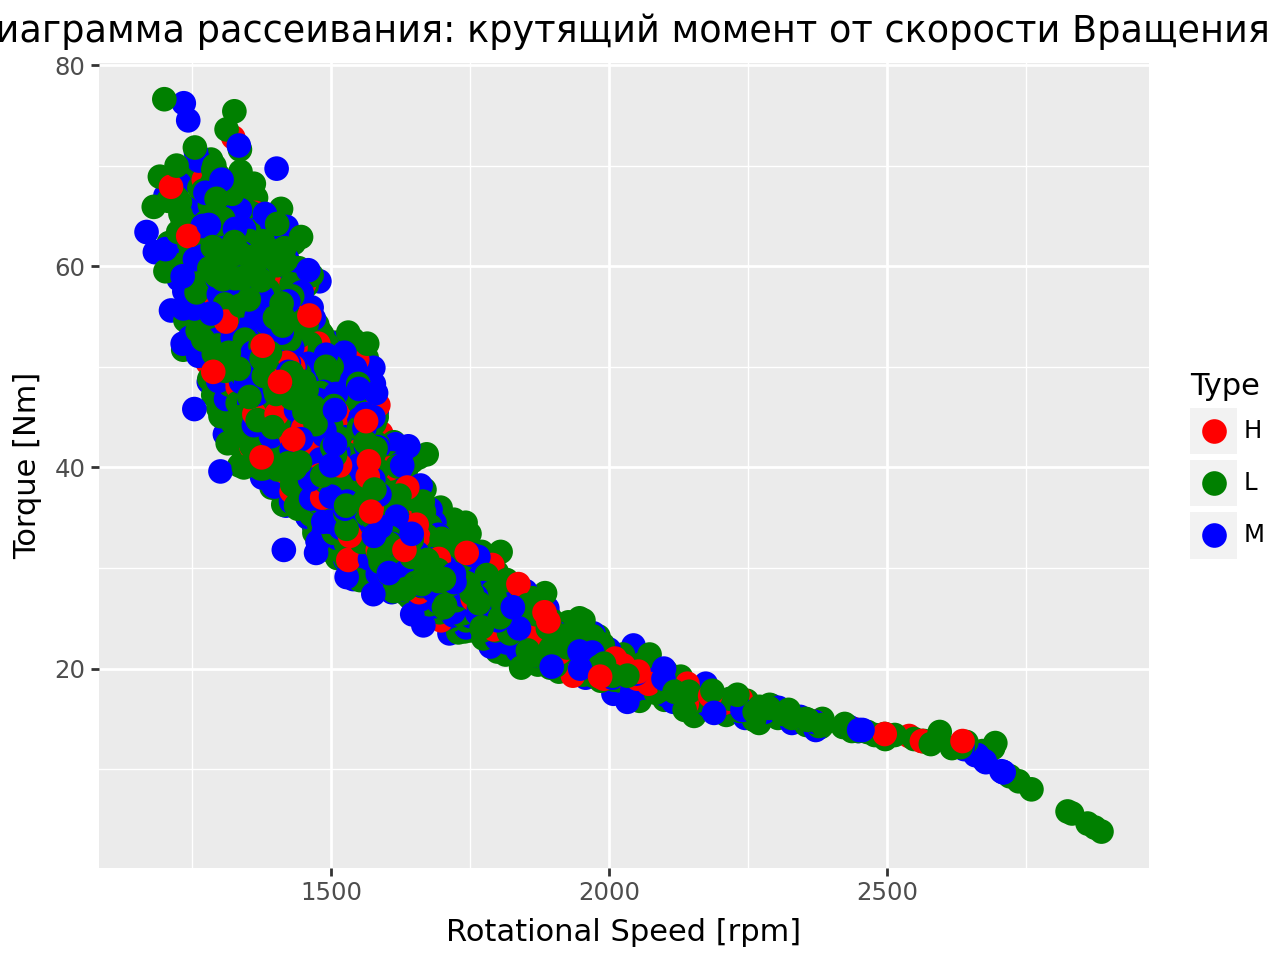

In [13]:
ggplot(df, aes(x='Rotational Speed', y='Torque', color='Type')) +\
geom_point(size=4) +\
scale_color_manual(values=['red', 'green', 'blue']) +\
ggtitle('Диаграмма рассеивания: крутящий момент от скорости Вращения ') +\
xlab('Rotational Speed [rpm]') +\
ylab('Torque [Nm]')